### Parte I: Análisis de la base de hogares y tipo de ocupación

#### 2-Eliminen todas las observaciones que no corresponden a los aglomerados de Ciudad Autónoma de Buenos Aires o Gran Buenos Aires y unan ambos trimestres en una sola base. Esto es, a la base de la encuesta individual de cada año (que usaron en el TP3) unan la base de la encuesta de hogar. Asegúrese de estar usando las variables CODUSU y NRO_Hogar para el merge

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
EPH2024H = pd.read_excel('usu_hogar_T124.xlsx')
EPH2004H = pd.read_stata("Hogar_t104.dta")

EPH_completo_I = pd.read_csv('respondieron_limpio.csv')


C:\Users\gabib\AppData\Local\Temp\ipykernel_24940\1765245510.py:4: DtypeWarning: Columns (2,15,22,23,24,25,26,27,28,29,30,31,32,34,35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  EPH_completo_I = pd.read_csv('respondieron_limpio.csv')


In [3]:
var_interes = ["codusu", "estado", "nro_hogar","desocupado",'ch04','ch06',"pareja_actual","cobertura_m","ch09","ch15", 'nivel_ed_or', 'ipcf']
EPH_completo_I = EPH_completo_I[["codusu", "estado", "nro_hogar","desocupado",'ch04','ch06',"pareja_actual","cobertura_m","ch09","ch15", 'nivel_ed_or', 'ipcf']]

In [4]:
EPH_completo_I

,codusu,estado,nro_hogar,desocupado,ch04,ch06,pareja_actual,cobertura_m,ch09,ch15,nivel_ed_or,ipcf
0,125098,3,1.0,0,1,79.0,0,1,1,1,3,206299.21760
1,125397,1,1.0,0,2,67.0,0,0,1,2,2,0.00000
2,125515,3,1.0,0,2,74.0,0,1,1,1,2,246662.10800
3,125558,1,1.0,0,1,54.0,1,1,1,1,2,298517.21025
4,125558,3,1.0,0,2,51.0,1,1,1,1,6,298517.21025
...,...,...,...,...,...,...,...,...,...,...,...,...
13004,TQRMNORWVHLKOPCDEIIAD00861660,3,1.0,0,1,21.0,0,1,1,1,5,0.00000
13005,TQRMNORWVHLKOPCDEIIAD00861660,3,1.0,0,1,19.0,0,1,1,1,5,0.00000
13006,TQRMNORWVHLKOPCDEIIAD00861660,3,1.0,0,2,16.0,0,1,1,1,3,0.00000
13007,TQRMNOPSYHJLOQCDEIIAD00794774,1,1.0,0,2,34.0,0,1,1,1,5,910000.00000


In [9]:
EPH2004H.columns = EPH2004H.columns.str.lower()
EPH2024H.columns = EPH2024H.columns.str.lower()

EPH2024BSH=EPH2024H[(EPH2024H["aglomerado"] == 32) | (EPH2024H["aglomerado"] == 33)]
EPH2004BSH=EPH2004H[(EPH2004H["aglomerado"] == "Ciudad de Buenos Aires") | (EPH2004H["aglomerado"] == "Partidos del GBA")]

In [11]:
EPH_completo_H= pd.concat([EPH2004BSH, EPH2024BSH], ignore_index=True)
EPH_completo_H

,codusu,nro_hogar,realizada,ano4,trimestre,region,mas_500,aglomerado,pondera,iv1,...,pdeccfr,adeccfr,vii1_1,vii1_2,vii2_1,vii2_2,vii2_3,vii2_4,idimph,pondih
0,125098,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1299.0,Departamento,...,,04,1.0,0.0,98.0,0.0,0.0,0.0,00000,NaN
1,125397,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,2018.0,Departamento,...,,00,1.0,0.0,98.0,0.0,0.0,0.0,00000,NaN
2,125515,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1486.0,Departamento,...,,05,1.0,0.0,98.0,0.0,0.0,0.0,00010,NaN
3,125558,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1674.0,Departamento,...,,06,2.0,0.0,3.0,4.0,0.0,0.0,00000,NaN
4,125599,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1471.0,Casa,...,,02,2.0,0.0,1.0,0.0,0.0,0.0,00000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,TQRMNOPSSHKMROCDEIJAH00861731,1.0,1,2024.0,1,1,S,33,3772.0,1,...,NaN,10,1,0,96,0,0,0,NaN,5211.0
4892,TQRMNOPWVHJLSSCDEIJAH00794914,1.0,1,2024.0,1,1,S,33,1862.0,1,...,NaN,2,4,2,98,0,0,0,NaN,4520.0
4893,TQRMNOQQWHKMOQCDEIJAH00861732,1.0,1,2024.0,1,1,S,33,2639.0,1,...,NaN,12,2,0,98,0,0,0,NaN,0.0
4894,TQRMNOSXRHKMNMCDEIJAH00861733,1.0,1,2024.0,1,1,S,33,1497.0,2,...,NaN,10,1,0,98,0,0,0,NaN,2000.0


In [13]:
# Suponiendo que tienes dos DataFrames: EPH_completo_I y EPH_completo_H

# Obtener los nombres de las columnas de ambos DataFrames
columnas_I = set(EPH_completo_I.columns)
columnas_H = set(EPH_completo_H.columns)
columnas_merge = set(["codusu", "nro_hogar"]) #mergeamos las dos columnas 

# Encontrar las columnas que comparten
columnas_comunes = columnas_I.intersection(columnas_H)

# Mostrar las columnas que comparten
print("Columnas comunes en ambos DataFrames:")
print(columnas_comunes)

columnas_interes = columnas_comunes - columnas_merge
columnas_interes = sorted(list(columnas_interes))

Columnas comunes en ambos DataFrames:
{'codusu', 'nro_hogar', 'ipcf'}


In [15]:
EPH_completo = pd.merge(EPH_completo_I, EPH_completo_H, on=["codusu", "nro_hogar"], suffixes=('_I', '_H'))


In [17]:
EPH_completo

,codusu,estado,nro_hogar,desocupado,ch04,ch06,pareja_actual,cobertura_m,ch09,ch15,...,pdeccfr,adeccfr,vii1_1,vii1_2,vii2_1,vii2_2,vii2_3,vii2_4,idimph,pondih
0,125098,3,1.0,0,1,79.0,0,1,1,1,...,,04,1.0,0.0,98.0,0.0,0.0,0.0,00000,NaN
1,125397,1,1.0,0,2,67.0,0,0,1,2,...,,00,1.0,0.0,98.0,0.0,0.0,0.0,00000,NaN
2,125515,3,1.0,0,2,74.0,0,1,1,1,...,,05,1.0,0.0,98.0,0.0,0.0,0.0,00010,NaN
3,125558,1,1.0,0,1,54.0,1,1,1,1,...,,06,2.0,0.0,3.0,4.0,0.0,0.0,00000,NaN
4,125558,3,1.0,0,2,51.0,1,1,1,1,...,,06,2.0,0.0,3.0,4.0,0.0,0.0,00000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13004,TQRMNORWVHLKOPCDEIIAD00861660,3,1.0,0,1,21.0,0,1,1,1,...,NaN,12,2,1,98,0,0,0,NaN,0.0
13005,TQRMNORWVHLKOPCDEIIAD00861660,3,1.0,0,1,19.0,0,1,1,1,...,NaN,12,2,1,98,0,0,0,NaN,0.0
13006,TQRMNORWVHLKOPCDEIIAD00861660,3,1.0,0,2,16.0,0,1,1,1,...,NaN,12,2,1,98,0,0,0,NaN,0.0
13007,TQRMNOPSYHJLOQCDEIIAD00794774,1,1.0,0,2,34.0,0,1,1,1,...,NaN,10,1,0,96,0,0,0,NaN,1781.0


#### 3-Limpien la base de datos tomando criterios que hagan sentido. Explicar cualquier decisión como el tratamiento de valores faltantes (missing values), extremos (outliers), o variables categóricas. Justifique sus decisiones

In [20]:
#revisamos si los valores duplicados tienen sentido:

for i in columnas_interes: #resto a ver si es el mismo valor
    valor_i = i + "_I"
    valor_h = i + "_I"
    resta = EPH_completo[valor_i] - EPH_completo[valor_h]

    for x in resta:
        if x != 0: 
            print("Existe una diferencia entre " + valor_i + " y " + valor_h + ": " + x)
    
    nan_check = resta.isna().sum()

    print("cantidad de nan en la resta de "+ i + ": " + str(nan_check))

cantidad de nan en la resta de ipcf: 0


In [22]:
#Missing values
#Aca nos fijamos cuantos valores hay con no NaN
print(EPH_completo_H.info())
print('Dimensión de la base:', EPH_completo.shape, '\n')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4896 entries, 0 to 4895
Data columns (total 89 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   codusu      4896 non-null   object 
 1   nro_hogar   4896 non-null   float64
 2   realizada   4896 non-null   object 
 3   ano4        4896 non-null   float64
 4   trimestre   4896 non-null   object 
 5   region      4896 non-null   object 
 6   mas_500     4896 non-null   object 
 7   aglomerado  4896 non-null   object 
 8   pondera     4896 non-null   float64
 9   iv1         4896 non-null   object 
 10  iv1_esp     2355 non-null   object 
 11  iv2         4896 non-null   object 
 12  iv3         4896 non-null   object 
 13  iv3_esp     2353 non-null   object 
 14  iv4         4896 non-null   object 
 15  iv5         4896 non-null   object 
 16  iv6         4896 non-null   object 
 17  iv7         4896 non-null   object 
 18  iv7_esp     2356 non-null   object 
 19  iv8         4896 non-null  

In [24]:
#NaN 
#Vemos los NaN en cada columna
for i in EPH_completo.columns:
    if EPH_completo[i].isna().sum()>0:
        print("Columna con NaN:", i, EPH_completo[i].isna().sum())
        

Columna con NaN: iv1_esp 5634
Columna con NaN: iv3_esp 5641
Columna con NaN: iv7_esp 5618
Columna con NaN: ii7_esp 5627
Columna con NaN: ii8_esp 5479
Columna con NaN: ix_men10 3976
Columna con NaN: idecifr 5643
Columna con NaN: pdecifr 5643
Columna con NaN: ideccfr 5643
Columna con NaN: pdeccfr 5643
Columna con NaN: idimph 5643
Columna con NaN: pondih 7366


In [26]:
EPH_completo["iv1_esp"].value_counts()
#Esta columna tiene 7350 valores NaN y 25 completados. No vale la pena agrupar, ni mantener la columna.   
#print()

iv1_esp
                                                 7350
casilla                                             8
VIV EN VILLA                                        7
VILLA                                               6
VIVIENDA EN LUGAR DE TRABAJO                        2
VIVIENDA EN UN DEPOSITO                             1
Casillo                                             1
Name: count, dtype: int64

In [28]:
EPH_completo["iv3_esp"].value_counts()

iv3_esp
                                                 7361
FKEXIPLAS                                           5
NADA                                                1
parket                                              1
Name: count, dtype: int64

In [30]:
EPH_completo["iv7_esp"].value_counts()

iv7_esp
                                                 7347
VECINO                                              7
carga los tachos                                    7
 LE DA UN VECINO                                    5
Camion de Agua                                      5
TANQUE COMUNITARIO                                  5
SE LO DA VECINO DE UNA BOMBA                        4
no tiene                                            4
no especifica                                       4
COMPRESOR                                           3
Name: count, dtype: int64

In [32]:
EPH_completo["ii7_esp"].value_counts() ##ii7 es suficiente, explica mas 

ii7_esp
                                                 7345
PRENDADO PAGAN CUOTAS                               5
PERTENECE ASUS PADRES QUE VIVEN EN PB.              5
EN SUCESION                                         4
bien de familia                                     4
EN COMODATO                                         3
casa tomada                                         3
es del papa de los hijos                            3
FAMILIAR DE SUS ABUELOS                             2
la vivienda esta a nombre de sus hijos y usuf       2
CEDIDO A SUS HIJAS CON CLAUSULA DE USO HASTA        1
ES DUEñA DE LA MITAD                                1
LA EMP LE PAGA EL ALQUILER Y TODOS LOS GASTOS       1
HERENCIA                                            1
no dice                                             1
no responde                                         1
Name: count, dtype: int64

In [34]:
EPH_completo["ii8_esp"].value_counts() #capaz conviene juntar electricidad

ii8_esp
                                                 7348
electricidad                                      101
electrico                                          15
NO TIENEN USAN EL DEL VECINO                       10
ELECTRICIDAD                                       10
ELECTRICO                                           7
Electricidad                                        6
Electrico                                           5
electrica                                           5
ELECTRICIDAD                                        3
cocina electrica                                    3
cocina en otra vivienda                             2
Cocina electrica                                    2
ELECTRICA                                           2
Electrica                                           2
COMPRA COMIDA HECHA                                 2
NADA,COME ABAJO                                     1
no dice                                             1
NO TIENE COCINA     

In [36]:
EPH_completo["ix_men10"].value_counts() #es numerica
#Para ver de donde vienen los NaN
EPH_completo[EPH_completo["ano4"]==2004]["ix_men10"].value_counts()

#Se puede asumir que los NaN son 0 en 2004 porque no hay en la columna (no le podemos preguntar a la persona). Es poco probable
## que haya personas sin hijos en la muestra

EPH_completo["ix_men10"]=EPH_completo["ix_men10"].fillna(0) #llenamos de ceros a los NaN

In [38]:
print(EPH_completo["idecifr"].value_counts()) #no la usamos
print(EPH_completo["pdecifr"].value_counts()) #los aglomerados que usamos son >500.000, no se usa, la volamos
print(EPH_completo["ideccfr"].value_counts()) #no se usa
print(EPH_completo["pdeccfr"].value_counts()) #no se usa
print(EPH_completo["idimph"].value_counts()) #los NaN estan porque en 2024 no se pregunta. No lo usamos, bye
print(EPH_completo["pondih"].value_counts()) #no esta en 2004, pero si en 2024. No lo usamos

idecifr
    7366
Name: count, dtype: int64
pdecifr
    7366
Name: count, dtype: int64
ideccfr
    7366
Name: count, dtype: int64
pdeccfr
    7366
Name: count, dtype: int64
idimph
00000    5702
10000    1016
00010     226
00100     115
11000      94
10010      74
10100      64
01000      37
11100      16
10110       6
11010       6
00110       4
01100       3
01010       3
Name: count, dtype: int64
pondih
0.0        1638
8403.0       14
1861.0       13
2358.0       12
21006.0      11
           ... 
1045.0        1
1602.0        1
1685.0        1
1626.0        1
1781.0        1
Name: count, Length: 1416, dtype: int64


In [40]:
#Outliers #Quiero ver las variables numericas, por eso uso EPH_completo_H
dt = EPH_completo_H.describe().T
print(dt.to_string())

             count           mean            std     min     25%     50%       75%          max
nro_hogar   4896.0       1.042279       1.021550     1.0     1.0     1.0       1.0        51.00
ano4        4896.0    2014.396242       9.993167  2004.0  2004.0  2024.0    2024.0      2024.00
pondera     4896.0    1878.282680     858.623786    42.0  1428.0  1673.0    2145.0      8685.00
ii3_1       4896.0       0.073529       0.273266     0.0     0.0     0.0       0.0         3.00
ii5_1       4896.0       0.007149       0.099795     0.0     0.0     0.0       0.0         2.00
ii6_1       4896.0       0.009804       0.108410     0.0     0.0     0.0       0.0         3.00
ix_tot      4896.0       3.002042       1.750294     1.0     2.0     3.0       4.0        15.00
ix_men10    3320.0       0.615361       0.886071     0.0     0.0     0.0       1.0         7.00
ix_mayeq10  4896.0       2.584763       1.391703     1.0     2.0     2.0       3.0        14.00
itf         4896.0  231093.796569  77527

In [42]:


#nro_hogar,año y pondera estan ok, no nos importan para el modelo
#ii3_1 no nos importa para el modelo, es condicional
#ii5_1 no nos importa para el modelo, es condicional
#ii6_1 solo esta en 2004 (VEEER)
#ix_tot ver que el maximo es 15 y en el cuartil 0.75 el valor es 4 (ver si se saca o no y si se usa)
#ix_men10 capaz. Ver, no parece afectar tanto el max
# ix_mayeq10 capaz.Ver porque el max 14.
# itf ver de sacar el maximo porque es muy alto y tira el promedio para arriba
# ipcf idem arriba. USAMOS ESTE      
# pondih no importa, no lo usamos

<Axes: xlabel='ch06'>

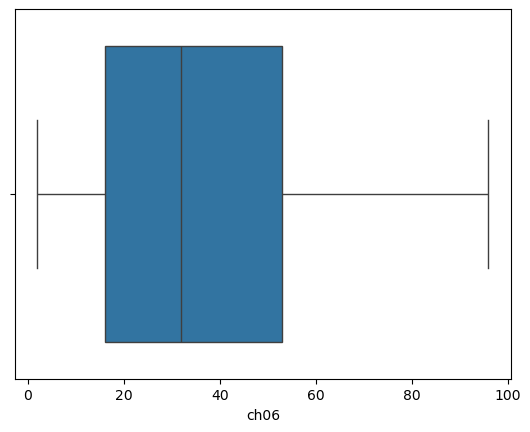

In [44]:
#Busquemos outliers en las variables que usamos anteriormente
#CH06
sns.boxplot(x=EPH_completo["ch06"]) 
#Esta ok, no hay outliers


<Axes: xlabel='ch09'>

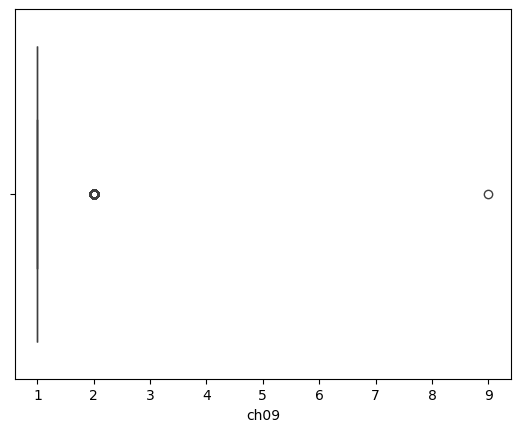

In [46]:
#CH06
sns.boxplot(x=EPH_completo["ch09"]) 
#ver hacer variable binaria

<Axes: xlabel='ch15'>

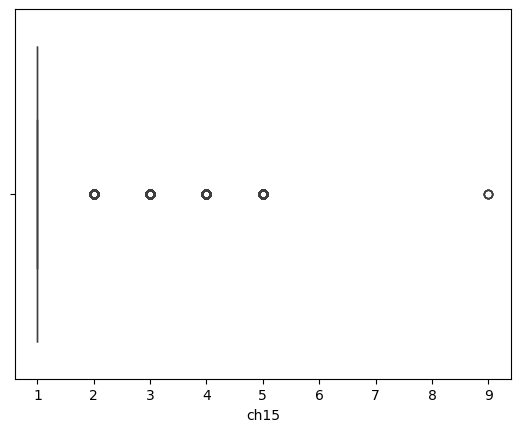

In [48]:
sns.boxplot(x=EPH_completo["ch15"]) 
#

<Axes: xlabel='ipcf_I'>

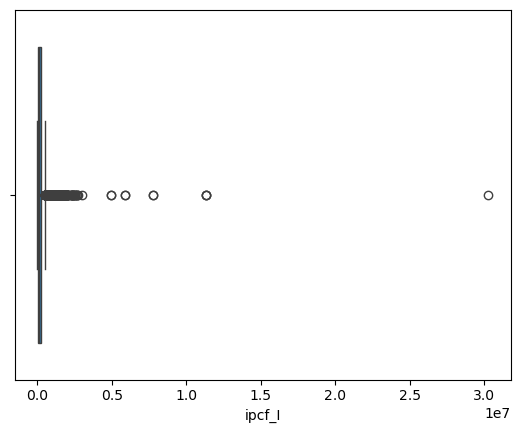

In [50]:
sns.boxplot(x=EPH_completo["ipcf_I"]) 
#Outilier feo feo
#Elinamos

1688


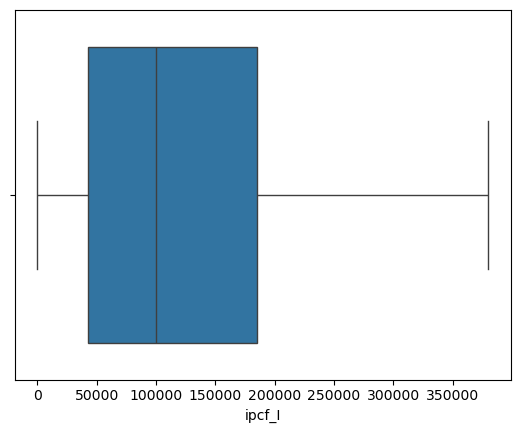

In [52]:

mediana=EPH_completo["ipcf_I"].median()

EPH_completo["median"]=mediana

#Calculo el MAD
EPH_completo["Distancia Mediana"] = np.abs(EPH_completo["ipcf_I"] - EPH_completo["median"] ) #Calculo la distancia absoluta a la mediana según el subgrupo
mediana=EPH_completo["Distancia Mediana"].median()

EPH_completo["MAD"]=mediana

EPH_completo_limpio = EPH_completo[EPH_completo["ipcf_I"] <= EPH_completo["median"] + EPH_completo["MAD"] * 3]


EPH_completo_limpio= EPH_completo_limpio[EPH_completo_limpio["ipcf_I"] >= EPH_completo_limpio["median"] - EPH_completo_limpio["MAD"] * 3]

sns.boxplot(x=EPH_completo_limpio["ipcf_I"]) 

print(len(EPH_completo) - len(EPH_completo_limpio))

In [54]:
EPH_completo_limpio = EPH_completo_limpio.drop(["median", "MAD", "Distancia Mediana"], axis=1)

In [56]:
var_interes

['codusu',
 'estado',
 'nro_hogar',
 'desocupado',
 'ch04',
 'ch06',
 'pareja_actual',
 'cobertura_m',
 'ch09',
 'ch15',
 'nivel_ed_or',
 'ipcf']

In [58]:
var_interes

['codusu',
 'estado',
 'nro_hogar',
 'desocupado',
 'ch04',
 'ch06',
 'pareja_actual',
 'cobertura_m',
 'ch09',
 'ch15',
 'nivel_ed_or',
 'ipcf']

In [60]:
#Seleccion de variables HOGAR para ver cual usamos 
var_interes = var_interes.remove(["codusu", "ipcf","nro_hogar"]) 
var_interes = var_interes+ ["iv1","iv2","iv3","iv4","iv6","iv8","iv11","iv12_1","iv12_2","iv12_3",
               "ii1","ii2","ii4_1","ii7","ii8","ii9","v1", "v2", "v3", "v5", "v7","v12"
               ,"v13","v14","v15","v16","v17", "ix_tot", "ix_men10","ix_mayeq10","ipcf_I","vii1_1","ano4"]
#Caracteristicas de la vivienda
#IV1 (tipo de vivienda por observacion entrevistador),
#IV2(# de ambientes), 
#IV3 (piso),  
#IV4 (TECHO), 
#IV6 (acceso a agua), 
#IV8 (baño, letrina), 
#IV11 (si tiene cloacas), 
#iv12_1 (cerca de basurales), 
#iv12_2 (zona inundable), 
#iv12_3 (villa de emergencia)

#Caracteristicas del hogar
#ii1 (preguntar, ambientes exclusivos para vivienda)
#ii2 (ambientes para dormir)
#ii4_1 (si tiene cocina)
#ii7 (regimen de tenencia)
#ii8 (combustible utilizado para cocinar) --> meter un valor y unificar electricidad
#ii9 (baño tenencia) veer si la dejamos

#Estrategias del hogar (chusmear despues por # de personas que viven en la casa y rango etario)
#v1 (vivir con ingresos del trabajo)
#v2 (ingresos jubilacion)
#v3 (indemnizacion por despido)
#v5 (subsidio social) 
#v7 (que te den mercaderia personas fuera del hogar) ver
#v12 (idem arriba pero con plata)
#v13 (de lo que tenia ahorrado)
#v14 (prestamos a familiares y amigos)
#v15 (prestamos con bancos)
#v16 (compras en cuotas)
#v17 (vender pertenencias)

#Resumen del hogar
#IX_tot (# de miembros del hogar)
#IX_men10 (idem <10)
#IX_mayeq10 (idem >10)
#IPCF (monto de ingreso per capita familiar)
#VII1_1 (si tiene empleada dosmetica)


ValueError: list.remove(x): x not in list

In [ ]:
#sns.boxplot(x=EPH_completo["ix_tot"]) 
mediana=EPH_completo["ix_tot"].median()

EPH_completo["median"]=mediana

#Calculo el MAD
EPH_completo["Distancia Mediana"] = np.abs(EPH_completo["ix_tot"] - EPH_completo["median"] ) #Calculo la distancia absoluta a la mediana según el subgrupo
mediana=EPH_completo["Distancia Mediana"].median()

EPH_completo["MAD"]=mediana

EPH_completo_limpio = EPH_completo[EPH_completo["ix_tot"] <= EPH_completo["median"] + EPH_completo["MAD"] * 3]


EPH_completo_limpio= EPH_completo_limpio[EPH_completo_limpio["ix_tot"] >= EPH_completo_limpio["median"] - EPH_completo_limpio["MAD"] * 3]

sns.boxplot(x=EPH_completo_limpio["ix_tot"]) 

print(len(EPH_completo) - len(EPH_completo_limpio))

In [ ]:
EPH_completo_limpio = EPH_completo_limpio.drop(["median", "MAD", "Distancia Mediana"], axis=1)

<Axes: xlabel='ix_mayeq10'>

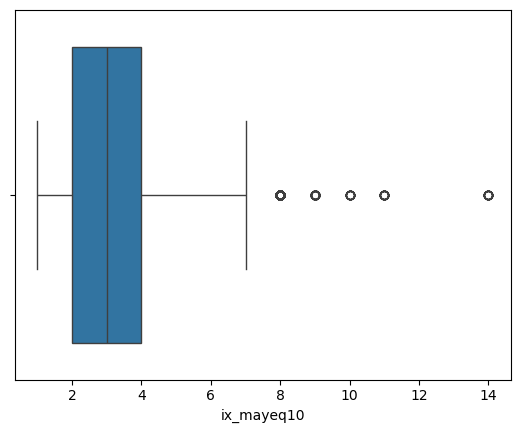

In [64]:
sns.boxplot(x=EPH_completo_limpio["ix_mayeq10"]) 

<Axes: xlabel='ix_men10'>

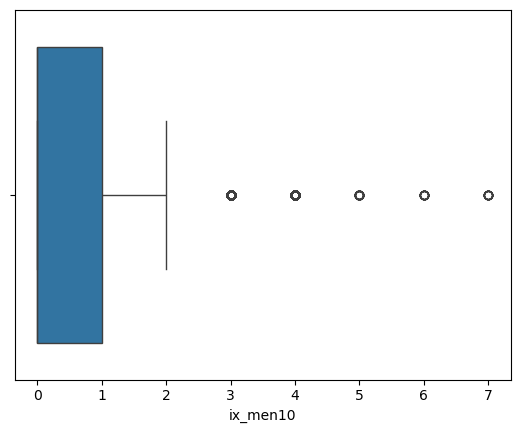

In [92]:
sns.boxplot(x=EPH_completo_limpio["ix_men10"]) 

#### Mapeo

In [95]:
#Caracteristicas de la vivienda
#IV2(# de ambientes),  --> Tiene un 99 ??


mapeo_IV1 = {
    'Casa': 1,
    'Departamento': 2,
    'Pieza de inquilinato': 3,
    'Pieza en hotel/pensión': 4,
    'local no construido para habitación': 5,
    'Otro':6
}

mapeo_IV3 = {
    'Mosaico/baldosa/madera/cerámica/alfombra': 1,
    'Cemento/ladrillo fijo': 2,
    'Ladrillo suelto/tierra': 3,
    'Otro': 4,
}

mapeo_IV4 = {
    'Membrana/cubierta asfáltica': 1,
    'Baldosa/losa sin cubierta': 2,
    'Pizarra/teja': 3,
    'Chapa de metal sin cubierta': 4,
    'Chapa de fibrocemento/plástico': 5,
    'Chapa de cartón':6,
    'N/S. Depto. de propiedad horizontal':9,
}

mapeo_IV6 = {
    'Por cañería dentro de la vivienda': 1,
    'Fuera de la vivienda pero dentro del terreno': 2,
    'Fuera del terreno': 3,
}

mapeo_IV11 = {
    'A red pública (cloaca)': 1,
    'A cámara séptica y pozo ciego': 2,
    'Sólo a pozo ciego': 3,
    'A hoyo/excavación en la tierra': 4,
    'Ns/Nr':9,
}

mapeo_SN = {
    'Sí': 1,
    'No': 2,
    'Ns./Nr.':9
}

#Caracteristicas del hogar
#ii1 (preguntar, ambientes exclusivos para vivienda) --> Algunos con más de 10
#ii7 (regimen de tenencia) --> Hay una que dice en relacion de dependencia
#ii9 (baño tenencia) veer si la dejamos
mapeo_II7 = {
    'Propietario de la vivienda y el terreno': 1,
    'Propietario de la vivienda solamente': 2,
    'Inquilino/arrendatario de la vivienda': 3,
    'Ocupante por pago de impuestos/expensas': 4,
    'Ocupante en relación de dependencia': 5,
    'Ocupante gratuito (con permiso)':6,
    'Ocupante de hecho (sin permiso)':7,
    'Está en sucesión': 8,
    'Otra situación': 9
}

mapeo_II8 = {
    'Gas de red': 1,
    'Gas de tubo/garrafa': 2,
    'Kerosene/leña/carbón': 3,
    'Otro': 4
}

mapeo_II9 = {
    'Uso exclusivo del hogar': 1,
    'Compartido con otro/s hogar/es de la misma vivienda': 2,
    'Compartido con otra/s vivienda/s': 3,
    'No tiene baño': 4
}


In [97]:
EPH_completo_limpio['iv1'] = EPH_completo_limpio.apply(
    lambda row: mapeo_IV1.get(row['iv1'], row['iv1']) 
    if row['ano4'] == 2004 else row['iv1'], axis=1)
EPH_completo_limpio['iv3'] = EPH_completo_limpio.apply(
    lambda row: mapeo_IV3.get(row['iv3'], row['iv3']) 
    if row['ano4'] == 2004 else row['iv3'], axis=1)
EPH_completo_limpio['iv4'] = EPH_completo_limpio.apply(
    lambda row: mapeo_IV4.get(row['iv4'], row['iv4']) 
    if row['ano4'] == 2004 else row['iv4'], axis=1)
EPH_completo_limpio['iv6'] = EPH_completo_limpio.apply(
    lambda row: mapeo_IV6.get(row['iv6'], row['iv6']) 
    if row['ano4'] == 2004 else row['iv6'], axis=1)
EPH_completo_limpio['iv8'] = EPH_completo_limpio.apply(
    lambda row: mapeo_SN.get(row['iv8'], row['iv8']) 
    if row['ano4'] == 2004 else row['iv8'], axis=1)
EPH_completo_limpio['iv11'] = EPH_completo_limpio.apply(
    lambda row: mapeo_IV11.get(row['iv11'], row['iv11']) 
    if row['ano4'] == 2004 else row['iv11'], axis=1)
EPH_completo_limpio['iv12_1'] = EPH_completo_limpio.apply(
    lambda row: mapeo_SN.get(row['iv12_1'], row['iv12_1']) 
    if row['ano4'] == 2004 else row['iv12_1'], axis=1)
EPH_completo_limpio['iv12_2'] = EPH_completo_limpio.apply(
    lambda row: mapeo_SN.get(row['iv12_2'], row['iv12_2']) 
    if row['ano4'] == 2004 else row['iv12_2'], axis=1)
EPH_completo_limpio['iv12_3'] = EPH_completo_limpio.apply(
    lambda row: mapeo_SN.get(row['iv12_3'], row['iv12_3']) 
    if row['ano4'] == 2004 else row['iv12_3'], axis=1)
EPH_completo_limpio['ii4_1'] = EPH_completo_limpio.apply(
    lambda row: mapeo_SN.get(row['ii4_1'], row['ii4_1']) 
    if row['ano4'] == 2004 else row['ii4_1'], axis=1)
EPH_completo_limpio['ii7'] = EPH_completo_limpio.apply(
    lambda row: mapeo_II7.get(row['ii7'], row['ii7']) 
    if row['ano4'] == 2004 else row['ii7'], axis=1)
EPH_completo_limpio['ii8'] = EPH_completo_limpio.apply(
    lambda row: mapeo_II8.get(row['ii8'], row['ii8']) 
    if row['ano4'] == 2004 else row['ii8'], axis=1)
EPH_completo_limpio['ii9'] = EPH_completo_limpio.apply(
    lambda row: mapeo_II9.get(row['ii9'], row['ii9']) 
    if row['ano4'] == 2004 else row['ii9'], axis=1)
EPH_completo_limpio['ii9'] = EPH_completo_limpio.apply(
    lambda row: mapeo_II9.get(row['ii9'], row['ii9']) 
    if row['ano4'] == 2004 else row['ii9'], axis=1)

for i in range(1,19):
    columna = "v" + str(i)
    EPH_completo_limpio[columna] = EPH_completo_limpio.apply(
        lambda row: mapeo_SN.get(row[columna], row[columna]) 
        if row['ano4'] == 2004 else row[columna], axis=1)

In [98]:
#Añadimos la opcion de cocina electrica a II8:
EPH_completo_limpio['ii8'] = EPH_completo_limpio.apply(
    lambda row: 5 if 'elec' in str(row['ii8_esp']).lower()
    else row['ii8'], axis=1)

In [99]:
EPH_completo_limpio["ii1"]

0        3.0
1        2.0
2        2.0
3        4.0
4        4.0
        ... 
13003      5
13004      5
13005      5
13006      5
13008      2
Name: ii1, Length: 11321, dtype: object

In [103]:
EPH_completo_limpio2 = EPH_completo_limpio[var_interes]

KeyError: "['ipcf'] not in index"

In [80]:
EPH_completo_limpio2

NameError: name 'EPH_completo_limpio2' is not defined

In [86]:
#Variables categoricas
# Notamos que origin es una variable categórica (toma valores 1, 2, 3)

# Usaremos one-hot encoding para transformar la columna categórica llamada origin 
# en varias columnas binarias (dummies).
# Cómo? get_dummies 

variables_cat= ["iv1","iv3","iv4","iv6","iv8","iv11","iv12_1","iv12_2","iv12_3","ii4_1","ii7","ii8","ii9",
                "v1", "v2", "v3", "v5", "v7","v12","v13","v14","v15","v16","v17", "ch04", "ch09", "ch15"]

EPH_dummies = pd.get_dummies(EPH_completo_limpio2, columns=variables_cat)

# Concatenamos con el df original
#EPH_dummies = pd.concat([EPH_completo_limpio, dummies], axis=1)
#auto_d.head()
#cuando tenemos una categorica en r no tenes que decir nada (ajusta n-1 parametros --> genera 3 columnas con dummies (001))

NameError: name 'EPH_completo_limpio2' is not defined

In [88]:
EPH_dummies

#EPH_completo_limpio["ii1"]

NameError: name 'EPH_dummies' is not defined

#### 4-Construya variables (mínimo 3) que no estén en la base pero que sean relevantes para predecir individuos desocupados (por ejemplo, la proporción de personas que trabajan en el hogar).

In [90]:

# de habitaciones / # de personas en el hogar
EPH_dummies['HpP'] = EPH_dummies.apply(
    lambda row: row['ix_tot'] / row['ii1'] if row['ii1'] > 0 else 0, axis=1
)


#proporcion de personas que trabajan en el hogar

# Filtrar las personas que trabajan (estado == 1)
trabajadores = EPH_dummies[EPH_dummies['estado'] == 1]

# Agrupar por 'codusu' y 'nro_hogar' y contar la cantidad de personas (codusu) que trabajan en cada combinación
trabajadores_hogar = trabajadores.groupby(['codusu', 'nro_hogar'])['estado'].count()

# Unir esta información al DataFrame original
EPH_dummies = EPH_dummies.merge(trabajadores_hogar, on=['codusu', 'nro_hogar'], how='left', suffixes=('', '_trabajadores'))

# Si hay combinaciones sin trabajadores (NaN), reemplazamos con 0
EPH_dummies['estado_trabajadores'].fillna(0, inplace=True)
EPH_dummies.rename(columns={'estado_trabajadores': 'trabajadores_hogar'}, inplace=True)


#Cantidad de dinero familiar entre cantidad de niños

EPH_dummies['ipcf_niño'] = EPH_dummies.apply(
    lambda row: row['ipcf_I'] / row['ix_men10'] if row['ix_men10'] > 0 else 0, axis=1
)

NameError: name 'EPH_dummies' is not defined

#### 5-Presenten estadísticas descriptivas de tres variables de la encuesta de hogar que ustedes creen que pueden ser relevantes para predecir la desocupación. Comenten las estadísticas obtenidas.

In [ ]:
# Selección de variables de interés para el análisis descriptivo, incluyendo nuevas variables relevantes
variables_relevantes = ['IV1', 'II7', 'II1', 'V13', 'V14', 'V15', 'V17']

# Estadísticas descriptivas para las variables seleccionadas
estadisticas = EPH_completo_limpio[variables_relevantes].describe()

# Mostrar las estadísticas descriptivas
print("Estadísticas descriptivas de las variables seleccionadas:")
print(estadisticas)

# Análisis adicional: frecuencias de variables categóricas y exploración visual
print("\nFrecuencia de los tipos de vivienda (IV1):")
print(EPH_completo_limpio['IV1'].value_counts())

print("\nFrecuencia del régimen de tenencia (II7):")
print(EPH_completo_limpio['II7'].value_counts())

print("\nFrecuencia de hogares que gastaron ahorros (V13):")
print(EPH_completo_limpio['V13'].value_counts())

print("\nFrecuencia de hogares que pidieron préstamos a familiares/amigos (V14):")
print(EPH_completo_limpio['V14'].value_counts())

print("\nFrecuencia de hogares que pidieron préstamos a bancos/financieras (V15):")
print(EPH_completo_limpio['V15'].value_counts())

print("\nFrecuencia de hogares que vendieron alguna pertenencia (V17):")
print(EPH_completo_limpio['V17'].value_counts())

# Visualizaciones utilizando matplotlib y seaborn
# Histograma del número de ambientes
plt.figure(figsize=(10, 6))
sns.histplot(EPH_completo_limpio['II1'], bins=10, kde=True)
plt.title('Distribución del Número de Ambientes')
plt.xlabel('Número de Ambientes')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras para el tipo de vivienda
plt.figure(figsize=(10, 6))
sns.countplot(x='IV1', data=EPH_completo_limpio, order=EPH_completo_limpio['IV1'].value_counts().index)
plt.title('Frecuencia del Tipo de Vivienda')
plt.xlabel('Tipo de Vivienda')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras para el régimen de tenencia
plt.figure(figsize=(10, 6))
sns.countplot(x='II7', data=EPH_completo_limpio, order=EPH_completo_limpio['II7'].value_counts().index)
plt.title('Frecuencia del Régimen de Tenencia')
plt.xlabel('Régimen de Tenencia')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras para hogares que gastaron ahorros (V13)
plt.figure(figsize=(10, 6))
sns.countplot(x='V13', data=EPH_completo_limpio, order=EPH_completo_limpio['V13'].value_counts().index)
plt.title('Hogares que Gastaron Ahorros')
plt.xlabel('Gastar Ahorros')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras para hogares que pidieron préstamos a familiares/amigos (V14)
plt.figure(figsize=(10, 6))
sns.countplot(x='V14', data=EPH_completo_limpio, order=EPH_completo_limpio['V14'].value_counts().index)
plt.title('Hogares que pidieron préstamos a Familiares/Amigos')
plt.xlabel('Préstamos Familiares/Amigos')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras para hogares que pidieron préstamos a bancos (V15)
plt.figure(figsize=(10, 6))
sns.countplot(x='V15', data=EPH_completo_limpio, order=EPH_completo_limpio['V15'].value_counts().index)
plt.title('Hogares que pidieron préstamos a Bancos/Financieras')
plt.xlabel('Préstamos Bancos/Financieras')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras para hogares que vendieron alguna pertenencia (V17)
plt.figure(figsize=(10, 6))
sns.countplot(x='V17', data=EPH_completo_limpio, order=EPH_completo_limpio['V17'].value_counts().index)
plt.title('Hogares que Vendieron alguna Pertenencia')
plt.xlabel('Venta de Pertenencias')
plt.ylabel('Frecuencia')
plt.show()


### Parte II: Clasificación y regularización

#### 1) Para cada año, partan la base respondieron en una base de prueba y unade entrenamiento (X_train, y_train, X_test, y_test) utilizando el comando train_test_split. La base de entrenamiento debe comprender el 70% de los datos, y la semilla a utilizar (random state instance) debe ser 101. Establezca a desocupado como su variable dependiente en la base de entrenamiento (vector y). El resto de las variables serán las variables independientes (matriz X). Recuerden agregar la columna de unos (1).

In [218]:

EPH_dummies["estado"].value_counts()
#Chusmear el ch09 y ch15

estado
1    5048
3    4919
4    1492
2     765
Name: count, dtype: int64

In [219]:
EPH_dummies2 = EPH_dummies[EPH_dummies["estado"] < 3]
EPH_dummies2["desocupado"].value_counts()

desocupado
0    5048
1     765
Name: count, dtype: int64

In [220]:
EPH_dummies2

,codusu,estado,nro_hogar,desocupado,ch06,pareja_actual,cobertura_m,nivel_ed_or,iv2,ii1,ii2,ix_tot,ix_men10,ix_mayeq10,ipcf_I,vii1_1,ano4,iv1_1,iv1_2,iv1_3,iv1_4,iv1_5,iv1_6,iv3_0.0,iv3_1.0,iv3_2.0,iv3_3.0,iv3_4.0,iv4_0.0,iv4_1.0,iv4_2.0,iv4_3.0,iv4_4.0,iv4_5.0,iv4_6.0,iv4_7.0,iv4_9.0,iv6_0.0,iv6_1.0,iv6_2.0,iv6_3.0,iv8_0.0,iv8_1.0,iv8_2.0,iv11_0.0,iv11_1.0,iv11_2.0,iv11_3.0,iv11_4.0,iv11_9.0,iv12_1_0.0,iv12_1_1.0,iv12_1_2.0,iv12_2_0.0,iv12_2_1.0,iv12_2_2.0,iv12_3_0.0,iv12_3_1.0,iv12_3_2.0,ii4_1_0.0,ii4_1_1.0,ii4_1_2.0,ii7_0.0,ii7_1.0,ii7_2.0,ii7_3.0,ii7_4.0,ii7_5.0,ii7_6.0,ii7_7.0,ii7_8.0,ii7_9.0,ii8_0.0,ii8_1.0,ii8_2.0,ii8_3.0,ii8_4.0,ii8_5.0,ii9_0.0,ii9_1.0,ii9_2.0,ii9_3.0,ii9_4.0,v1_1,v1_2,v1_9,v2_1,v2_2,v2_9,v3_1,v3_2,v3_9,v5_1,v5_2,v5_9,v7_1,v7_2,v7_9,v12_1,v12_2,v12_9,v13_1,v13_2,v13_9,v14_1,v14_2,v14_9,v15_1,v15_2,v15_9,v16_1,v16_2,v16_9,v17_1,v17_2,v17_9,ch04_1,ch04_2,ch09_1,ch09_2,ch09_9,ch15_1,ch15_2,ch15_3,ch15_4,ch15_5,ch15_9,HpP,trabajadores_hogar,ipcf_niño
1,125397,1,1.0,0,67.0,0,0,2,2.0,2.0,1.0,1.0,0.0,1.0,0.00000,1.0,2004.0,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,True,False,False,False,True,False,False,False,False,0.50,1.0,0.0
3,125558,1,1.0,0,54.0,1,1,2,4.0,4.0,3.0,4.0,0.0,4.0,298517.21025,2.0,2004.0,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,False,True,False,False,True,False,False,True,False,True,False,True,False,False,True,False,False,False,False,False,1.00,3.0,0.0
5,125558,1,1.0,0,25.0,0,1,5,4.0,4.0,3.0,4.0,0.0,4.0,298517.21025,2.0,2004.0,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,True,False,False,True,False,False,False,False,False,1.00,3.0,0.0
6,125558,1,1.0,0,20.0,0,1,5,4.0,4.0,3.0,4.0,0.0,4.0,298517.21025,2.0,2004.0,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,True,False,False,True,False,False,False,False,False,1.00,3.0,0.0
7,125599,1,1.0,0,55.0,1,0,4,4.0,4.0,3.0,5.0,0.0,5.0,116603.90560,2.0,2004.0,True,False,False,False,False,False,False,True,False,Fals

In [221]:
from sklearn.model_selection import train_test_split

X = EPH_dummies2.drop(columns=['estado', "desocupado", "codusu", "nro_hogar", "ano4", "vii1_1", "nivel_ed_or"])  # Variables independientes
X["unos"] = 1
y = EPH_dummies2['desocupado']                # Variable dependiente

# División en entrenamiento (70%) y prueba (30%) con semilla 101
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Confirmamos las dimensiones
print(f"Tamaño de entrenamiento: {X_train.shape}, prueba: {X_test.shape}")
## 33 # de columnas

Tamaño de entrenamiento: (4069, 124), prueba: (1744, 124)


In [228]:
from sklearn.preprocessing import StandardScaler
# Iniciamos el Standard Scaler
sc = StandardScaler()

columns_to_scale = ['ch06', 'ipcf_I', "iv2","ii1","ii2", "ix_tot", "ix_men10", "ix_mayeq10", "HpP", "trabajadores_hogar","ipcf_niño"]

# Estandarizamos las observaciones de entrenamiento
#X_train_transformed = pd.DataFrame(sc.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
X_train_transformed = X_train.copy()
X_train_transformed[columns_to_scale] = sc.fit_transform(X_train[columns_to_scale])

# Estandarizamos solo las columnas seleccionadas de X_test usando el scaler ajustado con X_train
X_test_transformed = X_test.copy()
X_test_transformed[columns_to_scale] = sc.transform(X_test[columns_to_scale])

# Estandarizamos las observaciones de test
#X_test_transformed = pd.DataFrame(sc.transform(X_test), index=X_test.index, columns=X_test.columns)
#Ajustamos el scaler a los datos de Train, pero a los datos de test le restamos la media 
#los datos de train y lo dividimos por la SD de los datos de train. 

# Estadisticas luego de estandarizar
X_train_transformed

,ch06,pareja_actual,cobertura_m,iv2,ii1,ii2,ix_tot,ix_men10,ix_mayeq10,ipcf_I,iv1_1,iv1_2,iv1_3,iv1_4,iv1_5,iv1_6,iv3_0.0,iv3_1.0,iv3_2.0,iv3_3.0,iv3_4.0,iv4_0.0,iv4_1.0,iv4_2.0,iv4_3.0,iv4_4.0,iv4_5.0,iv4_6.0,iv4_7.0,iv4_9.0,iv6_0.0,iv6_1.0,iv6_2.0,iv6_3.0,iv8_0.0,iv8_1.0,iv8_2.0,iv11_0.0,iv11_1.0,iv11_2.0,iv11_3.0,iv11_4.0,iv11_9.0,iv12_1_0.0,iv12_1_1.0,iv12_1_2.0,iv12_2_0.0,iv12_2_1.0,iv12_2_2.0,iv12_3_0.0,iv12_3_1.0,iv12_3_2.0,ii4_1_0.0,ii4_1_1.0,ii4_1_2.0,ii7_0.0,ii7_1.0,ii7_2.0,ii7_3.0,ii7_4.0,ii7_5.0,ii7_6.0,ii7_7.0,ii7_8.0,ii7_9.0,ii8_0.0,ii8_1.0,ii8_2.0,ii8_3.0,ii8_4.0,ii8_5.0,ii9_0.0,ii9_1.0,ii9_2.0,ii9_3.0,ii9_4.0,v1_1,v1_2,v1_9,v2_1,v2_2,v2_9,v3_1,v3_2,v3_9,v5_1,v5_2,v5_9,v7_1,v7_2,v7_9,v12_1,v12_2,v12_9,v13_1,v13_2,v13_9,v14_1,v14_2,v14_9,v15_1,v15_2,v15_9,v16_1,v16_2,v16_9,v17_1,v17_2,v17_9,ch04_1,ch04_2,ch09_1,ch09_2,ch09_9,ch15_1,ch15_2,ch15_3,ch15_4,ch15_5,ch15_9,HpP,trabajadores_hogar,ipcf_niño,unos
5303,1.423259,1,0,-0.034073,-0.007326,1.284620,0.956094,1.992048,-0.051101,-0.366294,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,True,False,False,False,False,True,False,False,False,0.401803,-0.842790,-0.279534,1
2938,0.718548,1,1,0.711319,0.844425,1.284620,0.298608,-0.625631,0.702265,0.890003,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,True,False,False,False,True,False,False,False,False,-0.412317,0.274978,-0.404714,1
2828,-1.254641,1,0,-0.034073,-0.007326,0.032015,0.298608,0.683208,-0.051101,-0.265232,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,True,False,False,True,False,False,False,False,False,-0.005257,0.274978,0.420995,1
9149,0.436664,1,1,-0.034073,-0.007326,-1.220589,-1.016365,-0.625631,-0.804467,0.404366,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,True,True,False,False,True,False,False,False,False,False,-0.819377,0.274978,-0.404714,1
1224,-1.043228,0,1,0.711319,0.844425,0.032015,0.298608,-0.625631,0.702265,

In [242]:
X_train_transformed2 = X_train_transformed.iloc[:, :10]
X_test2 = X_test.iloc[:, :10]

In [243]:
X_train_transformed2

,ch06,pareja_actual,cobertura_m,iv2,ii1,ii2,ix_tot,ix_men10,ix_mayeq10,ipcf_I
5303,1.423259,1,0,-0.034073,-0.007326,1.284620,0.956094,1.992048,-0.051101,-0.366294
2938,0.718548,1,1,0.711319,0.844425,1.284620,0.298608,-0.625631,0.702265,0.890003
2828,-1.254641,1,0,-0.034073,-0.007326,0.032015,0.298608,0.683208,-0.051101,-0.265232
9149,0.436664,1,1,-0.034073,-0.007326,-1.220589,-1.016365,-0.625631,-0.804467,0.404366
1224,-1.043228,0,1,0.711319,0.844425,0.032015,0.298608,-0.625631,0.702265,-0.050845
...,...,...,...,...,...,...,...,...,...,...
1170,0.295722,1,0,-0.034073,-0.007326,-1.220589,-1.016365,-0.625631,-0.804467,0.435436
11942,0.929961,0,1,-0.034073,-0.007326,0.032015,-1.673851,-0.625631,-1.557833,-0.036141
2613,1.493730,1,0,-0.034073,-0.007326,0.032015,-0.358879,-0.625631,-0.051101,-0.212939
3018,0.295722,0,0,-1.524856,-0.859078,-1.220589,-1.673851,-0.625631,-1.557833,-0.071988


#### 2) Expliquen brevemente cómo elegirían λ por validación cruzada (en 
Python es alpha)  Detallen por qué no usarían el conjunto de prue b 
(tes ) para su elecci
ón

In [244]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Configuración para LASSO (L1) y Ridge (L2)
param_grid = {'C': [10**n for n in range(-5, 6)]}  # C es el inverso de lambda
lasso = LogisticRegression(penalty='l1', solver='liblinear', random_state=101, max_iter=10000)
ridge = LogisticRegression(penalty='l2', solver='lbfgs', random_state=101, max_iter=10000)

# GridSearch con 10-fold CV
lasso_cv = GridSearchCV(lasso, param_grid, cv=10, scoring='accuracy')
ridge_cv = GridSearchCV(ridge, param_grid, cv=10, scoring='accuracy')

lasso_cv.fit(X_train_transformed2, y_train)
ridge_cv.fit(X_train_transformed2, y_train)

print("Mejor C para LASSO:", lasso_cv.best_params_)
print("Mejor C para Ridge:", ridge_cv.best_params_)


Mejor C para LASSO: {'C': 1e-05}
Mejor C para Ridge: {'C': 0.1}


#### 3) En validación cruzada, ¿cuáles son las implicancias de usar un k muy pequeño o uno muy grande? Cuando k = n (con n el número de muestras), ¿cuántas veces se estima el modelo? 

Implicancias del valor de k en validación cruzada
k pequeño: Mayor variabilidad en la evaluación, menos representativo.
k grande: Más representativo pero computacionalmente costoso.
k = n: Método "leave-one-out", evalúa n veces pero es intensivo computacionalmente.odad

#### 4) Para regresión logística, implementen la penalidad, L1 como la de LASSO y L2 como la de Ridge con λ = 1 (como en la Tutorial 10), usando la opción penalty y reporten la matriz de confusión, la curva ROC, los valores de AUC y de Accuracy para cada año.1 ¿Cómo cambiaron  los resultados con respecto al TP3? ¿La performance de regresión logística con regularización es mejor o peor?

LASSO - Accuracy: 0.8761467889908257
LASSO - Matriz de confusión:
 [[1528    0]
 [ 216    0]]
LASSO - AUC: 0.5
Ridge - Accuracy: 0.8761467889908257
Ridge - Matriz de confusión:
 [[1528    0]
 [ 216    0]]
Ridge - AUC: 0.5395245540042661


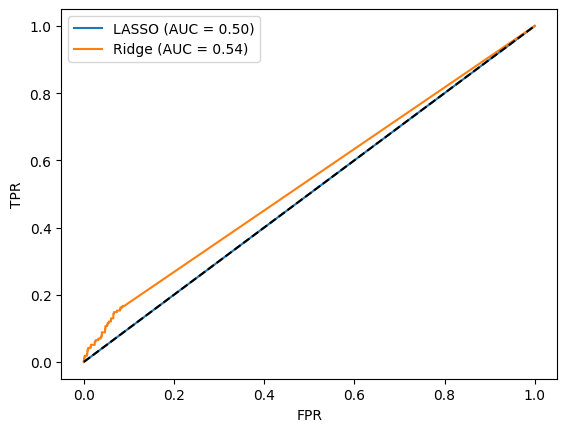

In [237]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt

# Predicciones para LASSO y Ridge
y_pred_lasso = lasso_cv.best_estimator_.predict(X_test2)
y_pred_ridge = ridge_cv.best_estimator_.predict(X_test2)

# Métricas
for model_name, y_pred in [("LASSO", y_pred_lasso), ("Ridge", y_pred_ridge)]:
    print(f"{model_name} - Accuracy:", accuracy_score(y_test, y_pred))
    print(f"{model_name} - Matriz de confusión:\n", confusion_matrix(y_test, y_pred))

    # Curva ROC
    y_score = lasso_cv.best_estimator_.predict_proba(X_test2)[:, 1] if model_name == "LASSO" else ridge_cv.best_estimator_.predict_proba(X_test2)[:, 1]
    auc = roc_auc_score(y_test, y_score)
    fpr, tpr, _ = roc_curve(y_test, y_score)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
    print(f"{model_name} - AUC:", auc)

# Gráfica ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()


#### 5) Realicen un barrido en λ = 10n con n ∈ {−5, −4, −3 ..., +4, +5} y utilice 10-fold CV para elegir el λ óptimo en regresión logística con Ridge y con LASSO. ¿Qué λ seleccionó en cada caso? Usando la librería de seabor, generen box plot mostrando la distribución del error de predicción para cada λ. Cada box debe corresponder a un valor de λ y contener como observaciones el error medio de validación (MSE) para cada partición. Además, para la regularización LASSO, generen un line plot del promedio de la proporción de variables ignoradas por el modelo en función de λ (como vieron en el tutorial 10), es decir la proporción de variables para las cuales el coeficiente asociador es cero.

c:\Users\gabri\anaconda3\envs\CienciaDatos\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\gabri\anaconda3\envs\CienciaDatos\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\gabri\anaconda3\envs\CienciaDatos\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:

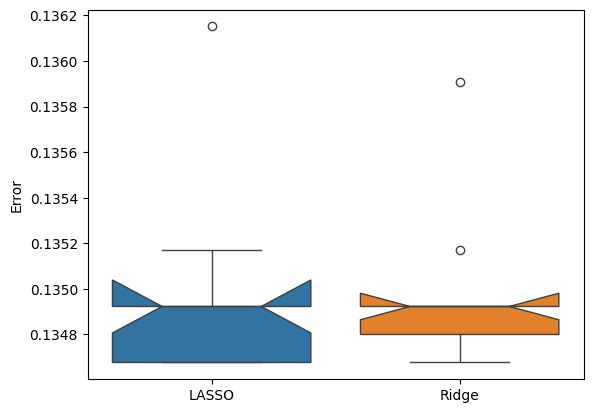

In [ ]:
import numpy as np
import seaborn as sns

errors_lasso = []
errors_ridge = []
lambdas = [10**n for n in range(-5, 6)]

for lam in lambdas:
    lasso = LogisticRegression(penalty='l1', C=1/lam, solver='liblinear').fit(X_train_transformed2, y_train)
    ridge = LogisticRegression(penalty='l2', C=1/lam, solver='lbfgs').fit(X_train_transformed2, y_train)

    # Error medio
    errors_lasso.append(1 - lasso.score(X_train_transformed2, y_train))
    errors_ridge.append(1 - ridge.score(X_train_transformed2, y_train))


# Boxplots
sns.boxplot(data=[errors_lasso, errors_ridge], notch=True)
plt.xticks([0, 1], ['LASSO', 'Ridge'])
plt.ylabel('Error')
plt.show()


#### 6) En el caso del valor óptimo de λparaLASSO encontrado en el inciso anterior, ¿qué variables fueron descartadas? ¿Son las que hubiera  esperado? ¿Tiene relación con lo que respondieron en el inciso 1 de a Parte I?

In [ ]:
# Obtener los coeficientes del modelo LASSO ajustado
lasso_best = lasso_cv.best_estimator_

# Obtener los nombres de las variables
feature_names = X_train.columns

# Identificar las variables ignoradas (coeficientes = 0)
ignored_features = feature_names[(lasso_best.coef_ == 0).flatten()]

# Imprimir las variables ignoradas
print(f"Variables ignoradas por LASSO con lambda óptimo: {list(ignored_features)}")
print(f"Número total de variables ignoradas: {len(ignored_features)}")

# Análisis interpretativo
if len(ignored_features) > 0:
    print("El modelo LASSO ha descartado algunas variables irrelevantes, reduciendo la complejidad del modelo.")
else:
    print("LASSO no descartó ninguna variable; probablemente todas las variables aporten información.")


AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

#### 7)Elijan alguno de los modelos de regresión logística donde hayan probado distintos parámetros de regularización y comenten: Compare los resultados de 2004 versus 2024, ¿qué método de regularización funcio ó mejor: Ridge o LASSO? ¿LASSO hizo una selección distinta de predictores en 2004 versus 2024? Comenten mencionando el error cuadrático medio (MSE).

In [ ]:
# Filtrar las bases de datos para 2004 y 2024
EPH_completo_limpio_2004 = EPH_completo_limpio[EPH_completo_limpio['ano4_I'] == 2004]
EPH_completo_limpio_2024 = EPH_completo_limpio[EPH_completo_limpio['ano4_I'] == 2024]

# Función para ajustar y evaluar un modelo (LASSO y Ridge)
def train_and_evaluate(EPH_completo_limpio, year):
    X = EPH_completo_limpio.drop(columns=['desocupado'])
    y = EPH_completo_limpio['desocupado']
    
    # División de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    
    # Ajustar LASSO
    lasso_cv = GridSearchCV(LogisticRegression(penalty='l1', solver='liblinear', random_state=101), 
                            param_grid={'C': [10**n for n in range(-5, 6)]}, 
                            cv=10, scoring='accuracy')
    lasso_cv.fit(X_train, y_train)
    lasso_best = lasso_cv.best_estimator_
    
    # Ajustar Ridge
    ridge_cv = GridSearchCV(LogisticRegression(penalty='l2', solver='lbfgs', random_state=101), 
                            param_grid={'C': [10**n for n in range(-5, 6)]}, 
                            cv=10, scoring='accuracy')
    ridge_cv.fit(X_train, y_train)
    ridge_best = ridge_cv.best_estimator_

    # Evaluación de modelos
    metrics = {}
    for model_name, model in [("LASSO", lasso_best), ("Ridge", ridge_best)]:
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        ignored_features = feature_names[(model.coef_ == 0).flatten()] if model_name == "LASSO" else []
        
        metrics[model_name] = {
            "accuracy": accuracy,
            "auc": auc,
            "ignored_features": ignored_features,
            "num_ignored_features": len(ignored_features)
        }

    # Mostrar resultados
    print(f"Resultados para {year}:")
    for model_name, values in metrics.items():
        print(f"  Modelo: {model_name}")
        print(f"    Accuracy: {values['accuracy']:.4f}")
        print(f"    AUC: {values['auc']:.4f}")
        if model_name == "LASSO":
            print(f"    Variables ignoradas: {list(values['ignored_features'])}")
            print(f"    Total variables ignoradas: {values['num_ignored_features']}")

# Comparar 2004 y 2024
train_and_evaluate(EPH_completo_limpio_2004, 2004) #aca hay que ver de pedir de la base de datos el año
train_and_evaluate(EPH_completo_limpio_2024, 2024)


ValueError: 
All the 110 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
110 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\gabib\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gabib\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\gabib\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1201, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\gabib\anaconda3\Lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\gabib\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1263, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\gabib\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 997, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\gabib\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py", line 521, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\gabib\anaconda3\Lib\site-packages\pandas\core\generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Servicio doméstico en hogares'
